## Prediction of Survival of Promoted Teams to the Premier League in the First Season using Logistic Regression

# The Problem
In English football pyramid, three teams are promoted from the second tier of the pyramid, The Championship, to the top, Premier League. These three teams take place of the worst three teams which are relegated. But soon after their promotion, these three teams are considered to be favorites to be relegated at the end of the season.<br /> Therefore it is of interest that we can find factors that can suggest whether a team promoted can survive the first season or not.

# The Solution
Using Logistical Regression Analysis applied to a dataset containing key factors with regards to every team promoted in each season of the league, we would like to create a model which can predict the survival of a promoted team. Using such a model, we could hopefully predict the survival or relegation of promoted teams in the future.

In [2]:
#Importing Packages
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as mtp
from sklearn.linear_model import LogisticRegression

In [3]:
#Reading the Dataset
ds = pd.read_csv(r'Promoted_Teams.csv')
ds.head()

,Season,Name,Prom,Money_Spent,Pts,Gl_Scored,Gl_Conc,Survival
0,92/93,Ipswich Town,1,0.75,52,50,55,1
1,92/93,Middlesbrough,2,3.18,44,54,75,0
2,92/93,Blackburn,3,11.84,71,68,46,1
3,93/94,Newcastle,1,6.60,77,82,41,1
4,93/94,West Ham,2,2.01,52,47,58,1


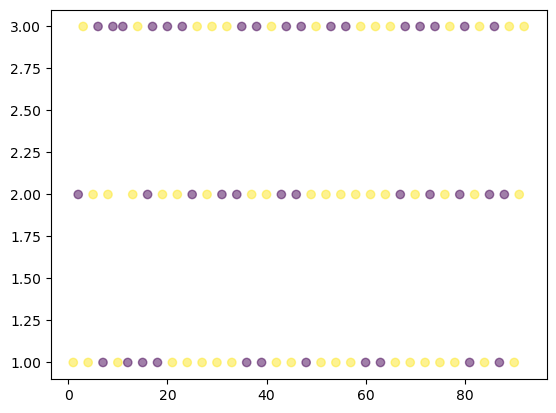

In [4]:
x = range(1, 93)
mtp.scatter(x, ds.Prom, c = ds.Survival, alpha = 0.5)
mtp.show()

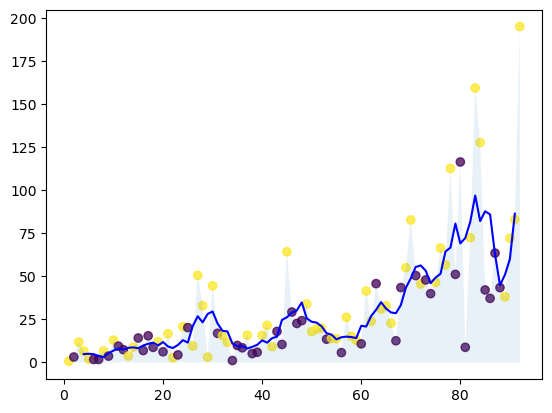

In [5]:
#Money Spent
mtp.scatter(x, ds.Money_Spent, c = ds.Survival, alpha = 0.75)
mtp.fill_between(x, ds.Money_Spent, alpha = 0.1)
rm = ds.Money_Spent.rolling(5).mean()
mtp.plot(rm, c = 'blue')
mtp.show()

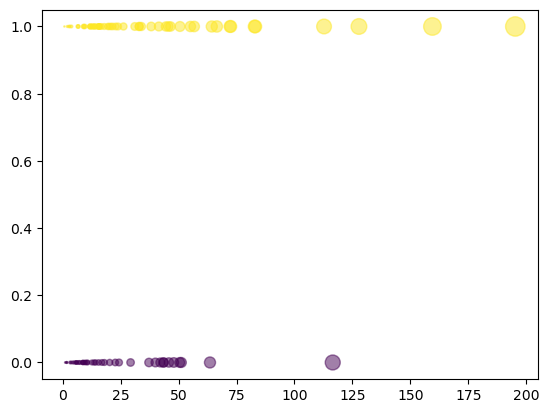

In [6]:
mtp.scatter(ds.Money_Spent, ds.Survival, c = ds.Survival, s = ds.Money_Spent, alpha = 0.5)
mtp.show()

In [7]:
mds = pd.read_csv(r'Total_Exp.csv')
mds.head()

,Season,Total_Exp
0,92/93,63.57
1,93/94,87.75
2,94/95,139.29
3,95/96,205.69
4,96/97,187.35


<function matplotlib.pyplot.show(close=None, block=None)>

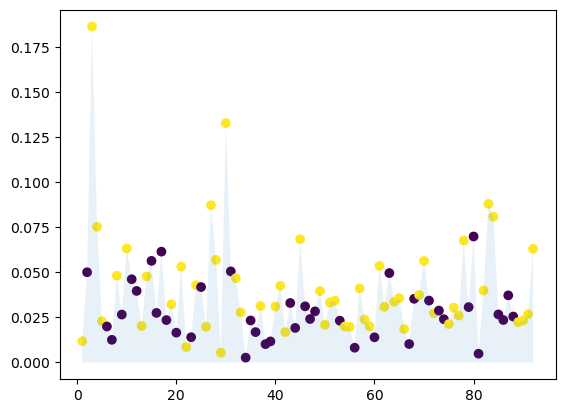

In [8]:
Exp_Factor = []
for a in range(0,92):
    for b in range(0,31):
        if ds.Season[a] == mds.Season[b]:
            Exp_Factor.append(ds.Money_Spent[a] / mds.Total_Exp[b])
mtp.scatter(x, Exp_Factor, c = ds.Survival)
mtp.fill_between(x, Exp_Factor, alpha = 0.1)
mtp.show

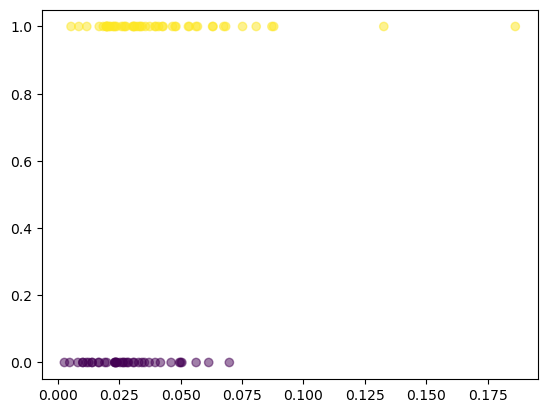

In [9]:
mtp.scatter(Exp_Factor, ds.Survival, c = ds.Survival, alpha = 0.5)
mtp.show()

In [10]:
ds.Money_Spent = Exp_Factor
ds.head()

,Season,Name,Prom,Money_Spent,Pts,Gl_Scored,Gl_Conc,Survival
0,92/93,Ipswich Town,1,0.011798,52,50,55,1
1,92/93,Middlesbrough,2,0.050024,44,54,75,0
2,92/93,Blackburn,3,0.186251,71,68,46,1
3,93/94,Newcastle,1,0.075214,77,82,41,1
4,93/94,West Ham,2,0.022906,52,47,58,1


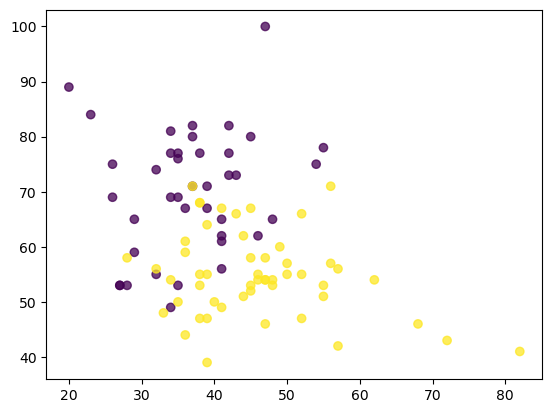

In [11]:
# Goal Scored and Goal Conceded
Gl_diff = ds.Gl_Scored - ds.Gl_Conc
mtp.scatter(ds.Gl_Scored, ds.Gl_Conc, c = ds.Survival, alpha = 0.75)
mtp.show()

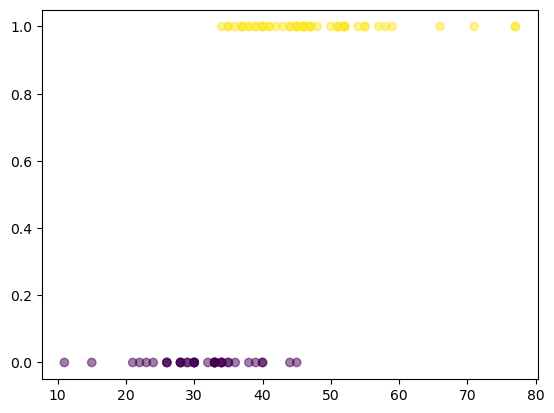

In [12]:
#Pts vs Survival
mtp.scatter(ds.Pts, ds.Survival, c = ds.Survival, alpha = 0.5)
mtp.show()

In [13]:
new_ds = ds.drop(columns = ['Season', 'Name '])
new_ds.head()

,Prom,Money_Spent,Pts,Gl_Scored,Gl_Conc,Survival
0,1,0.011798,52,50,55,1
1,2,0.050024,44,54,75,0
2,3,0.186251,71,68,46,1
3,1,0.075214,77,82,41,1
4,2,0.022906,52,47,58,1


In [14]:
cor_ds = new_ds.corr()
cor_ds


,Prom,Money_Spent,Pts,Gl_Scored,Gl_Conc,Survival
Prom,1.000000,-0.054834,-0.161682,-0.073246,0.223400,-0.160257
Money_Spent,-0.054834,1.000000,0.395483,0.301582,-0.257509,0.268063
Pts,-0.161682,0.395483,1.000000,0.804786,-0.718846,0.693965
Gl_Scored,-0.073246,0.301582,0.804786,1.000000,-0.326056,0.445209
Gl_Conc,0.223400,-0.257509,-0.718846,-0.326056,1.000000,-0.630010
Survival,-0.160257,0.268063,0.693965,0.445209,-0.630010,1.000000


In [15]:
cor_ds.loc[['Gl_Scored'],['Gl_Conc']]

,Gl_Conc
Gl_Scored,-0.326056


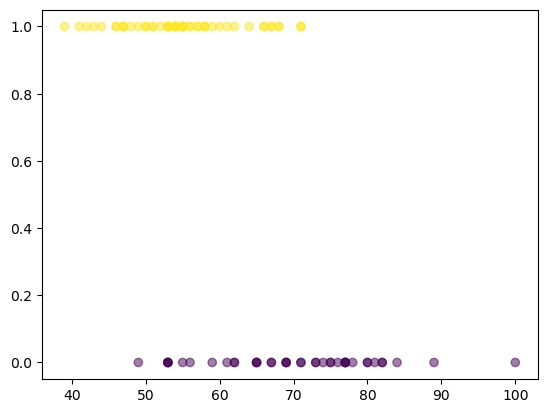

In [16]:
mtp.scatter(ds.Gl_Conc, ds.Survival, c = ds.Survival, alpha = 0.5)
mtp.show()

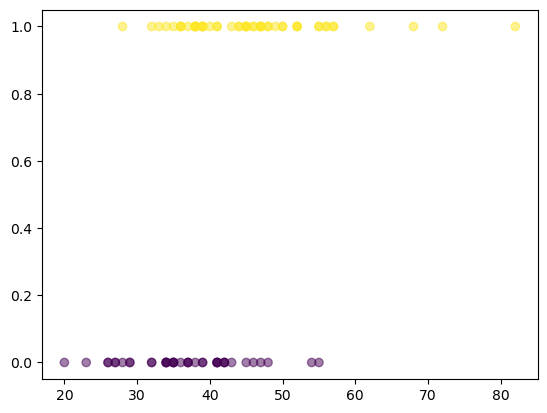

In [18]:
mtp.scatter(ds.Gl_Scored, ds.Survival, c = ds.Survival, alpha = 0.5)
mtp.show()

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
dep = ds.drop(columns = ['Name ', 'Season', 'Survival'] )
dep.head()

,Prom,Money_Spent,Pts,Gl_Scored,Gl_Conc
0,1,0.011798,52,50,55
1,2,0.050024,44,54,75
2,3,0.186251,71,68,46
3,1,0.075214,77,82,41
4,2,0.022906,52,47,58


In [21]:
Indep = ds.Survival
Indep.head()

0    1
1    0
2    1
3    1
4    1
Name: Survival, dtype: int64

In [24]:
x_train, x_test, y_train, y_test = train_test_split(dep, Indep, test_size = 0.35, random_state = 92)

In [25]:
x_train.head()

,Prom,Money_Spent,Pts,Gl_Scored,Gl_Conc
61,3,0.030837,46,45,53
26,1,0.087171,44,36,44
40,3,0.042513,55,52,55
68,1,0.037440,42,45,67
89,1,0.023300,52,55,53


In [26]:
y_train.head()

61    1
26    1
40    1
68    1
89    1
Name: Survival, dtype: int64

In [28]:
lr = LogisticRegression(random_state = 79).fit(x_train, y_train)
lr.predict(x_train)

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1], dtype=int64)

In [29]:
lr.score(x_train, y_train)

0.8813559322033898

In [30]:
lr.score(x_test, y_test)

0.8484848484848485

In [32]:
print(lr.coef_)
print(lr.intercept_)

[[ 0.42719085  0.02709408  0.41353727 -0.0053246  -0.08346386]]
[-10.47931182]


In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [37]:
sc_dep = scaler.transform(dep)
sc_dep

array([[-1.21814243, -0.93142534,  0.99408709,  0.78800844, -0.54291803],
       [ 0.        ,  0.51707372,  0.32037798,  1.17621073,  1.12759899],
       [ 1.21814243,  5.67921439,  2.59414625,  2.53491872, -1.29465069],
       [-1.21814243,  1.47161274,  3.09942809,  3.89362672, -1.71227995],
       [ 0.        , -0.51050621,  0.99408709,  0.49685673, -0.29234048],
       [ 1.21814243, -0.6227831 , -0.85861298,  0.49685673,  3.21574527],
       [-1.21814243, -0.90241039,  0.40459162, -0.7648007 , -1.04407314],
       [ 0.        ,  0.44422311,  3.09942809,  2.92312101, -1.54522825],
       [ 1.21814243, -0.37191841, -0.94282662,  0.30275559,  1.54522825],
       [-1.21814243,  1.01644535,  0.23616434, -0.66775013, -0.96054729],
       [ 1.21814243,  0.36981201, -0.94282662, -0.27954784,  0.79349559],
       [-1.21814243,  0.12430043, -0.01647658, -0.66775013, -0.70996974],
       [ 0.        , -0.61192674,  0.48880526,  0.30275559, -0.29234048],
       [ 1.21814243,  0.42971335,  0.5

In [38]:
x2_train, x2_test, y2_train, y2_test = train_test_split(sc_dep, Indep, test_size = 0.35, random_state = 92)

In [39]:
lr2 = LogisticRegression(random_state=79).fit(x2_train, y2_train)
lr2.predict(x2_train)

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1], dtype=int64)

In [40]:
lr2.score(x2_train, y2_train)

0.8983050847457628

In [41]:
lr2.score(x2_test, y2_test)

0.8484848484848485

In [42]:
print(lr2.coef_)
print(lr2.intercept_)

[[ 0.07106173  0.40240787  1.82721772  0.52499173 -1.11897528]]
[0.97185491]
